In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Any results you write to the current directory are saved as output.

In [33]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [35]:
df_train.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

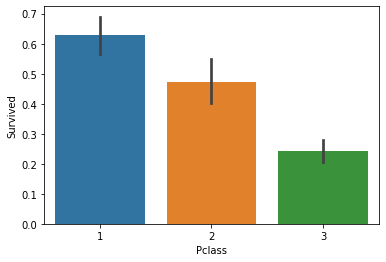

In [36]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

In [37]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'lonely'] = 0
    dataset.loc[dataset['relatives'] == 0, 'lonely'] = 1
    dataset['lonely'] = dataset['lonely'].astype(int)

df_train['lonely'].value_counts()

1    537
0    354
Name: lonely, dtype: int64

/home/medium/titanic/venv/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


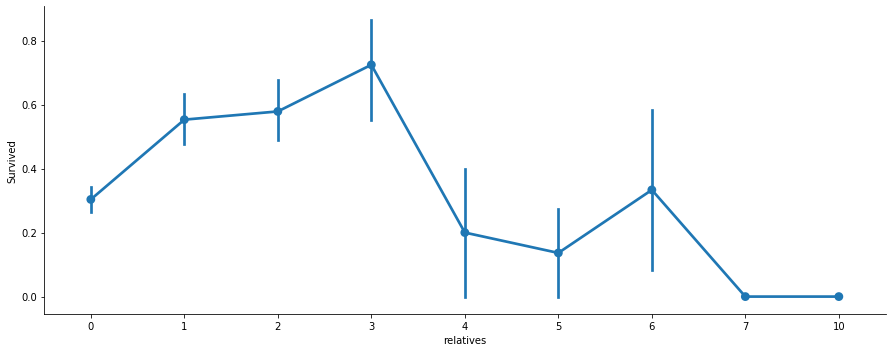

In [38]:
axes = sns.factorplot('relatives', 'Survived', data=df_train, aspect = 2.5)

In [39]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)


In [40]:
data = [df_train, df_test]
for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_copy = dataset["Age"].copy()
    age_copy[np.isnan(age_copy)] = rand_age
    dataset["Age"] = age_copy
    dataset["Age"] = df_train["Age"].astype(int)
    
df_train["Age"].isnull().sum()

0

In [41]:
value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(value)
    
df_train['Embarked'].isna().sum()

0

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
relatives      891 non-null int64
lonely         891 non-null int64
Deck           891 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 104.5+ KB


In [43]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] == dataset['Fare'].astype(int)

In [44]:
df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male   15      0   
6                            McCarthy, Mr. Timothy J    male   54      0   
7                     Palsson, Master. Gosta Leonard    male    2      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   

   Parch            Ticket     Fare Cabin Embarked  relatives  lonely  Deck  
0      0         A/5 21171   7.2500    U0        S          1       0     8  
1      0          PC 17599  71.2833   C85        C          1       0     3  
2      0  STON/O2. 3101282   7.9250    U0        S          0       1     8  
3      0            113803  53.1000  C123        S          1       0     3  
4      0            373450   8.0500    U0        S          0       1     8  
5      0            330877   8.4583    U0        Q          0       1     8  
6      0             17463  51.8625   E46        S          0       1     5  
7      1            349909  21.0750    U0        S          4       0     8  
8      2            347742  11.1333    U0        S          2       0     8  
9      0            237736  30.0708    U0        C          1       0     8

In [45]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [46]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [47]:
df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   
5                                   Moran, Mr. James    0   15      0      0   
6                            McCarthy, Mr. Timothy J    0   54      0      0   
7                     Palsson, Master. Gosta Leonard    0    2      3      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1   27      0      2   
9                Nasser, Mrs. Nicholas (Adele Achem)    1   14      1      0   

             Ticket     Fare Cabin  Embarked  relatives  lonely  Deck  
0         A/5 21171   7.2500    U0         0          1       0     8  
1          PC 17599  71.2833   C85         1          1       0     3  
2  STON/O2. 3101282   7.9250    U0         0          0       1     8  
3            113803  53.1000  C123         0          1       0     3  
4            373450   8.0500    U0         0          0       1     8  
5            330877   8.4583    U0         2          0       1     8  
6             17463  51.8625   E46         0          0       1     5  
7            349909  21.0750    U0         0          4       0     8  
8            347742  11.1333    U0         0          2       0     8  
9            237736  30.0708    U0         1          1       0     8

In [48]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 25), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 28), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 33), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 37), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 66), 'Age'] = 8
    dataset.loc[dataset['Age'] > 66, 'Age'] = 9
    
df_train['Age'].value_counts()

7    123
5    122
2    114
1     97
8     94
6     93
3     92
4     81
0     68
9      7
Name: Age, dtype: int64

In [49]:
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [50]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

df_train = df_train.drop(['PassengerId'], axis=1)

In [51]:
df_train.head(10)

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  relatives  \
0         0       3    0    2      1      0     0         0          1   
1         1       1    1    7      1      0     3         1          1   
2         1       3    1    4      0      0     1         0          0   
3         1       1    1    6      1      0     3         0          1   
4         0       3    0    6      0      0     1         0          0   
5         0       3    0    1      0      0     1         2          0   
6         0       1    0    8      0      0     3         0          0   
7         0       3    0    0      3      1     2         0          4   
8         1       3    1    4      0      2     1         0          2   
9         1       2    1    1      1      0     2         1          1   

   lonely  Deck  
0       0     8  
1       0     3  
2       1     8  
3       0     3  
4       1     8  
5       1     8  
6       1     5  
7       0     8  
8       0     8  
9       0     8

In [52]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test = df_test.drop("PassengerId", axis=1).copy()

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': Y_prediction})

filename = 'predict_titanic.csv'

submission.to_csv(filename,index=False)

93.04


In [62]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': Y_prediction})

filename = 'predict_titanic_dt.csv'

submission.to_csv(filename,index=False)

93.04


In [55]:
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Mean: ", round(scores.mean() * 100, 2))
print("Std Dvn: ", round(scores.std() * 100, 2))

Mean:  80.93
Std Dvn:  4.41


In [56]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

importance
feature              
Sex             0.299
Age             0.207
Deck            0.101
Fare            0.100
Pclass          0.093
relatives       0.065
Embarked        0.058
SibSp           0.036
Parch           0.029
lonely          0.013

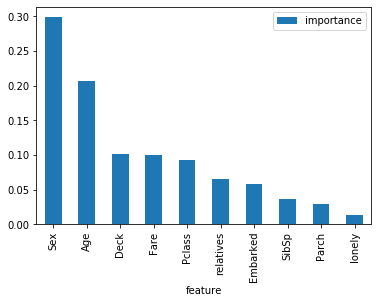

In [57]:
importances.plot.bar()

In [58]:
df_train = df_train.drop("lonely", axis=1)
df_test = df_test.drop("lonely", axis=1)

In [59]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.04 %


In [60]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.25 %


In [61]:
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
print("Precision:", precision_score(Y_train, predictions))

Precision: 0.7719869706840391
